# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [18]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file = 'data/valid.p' 
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [181]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of training examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of training examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [20]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

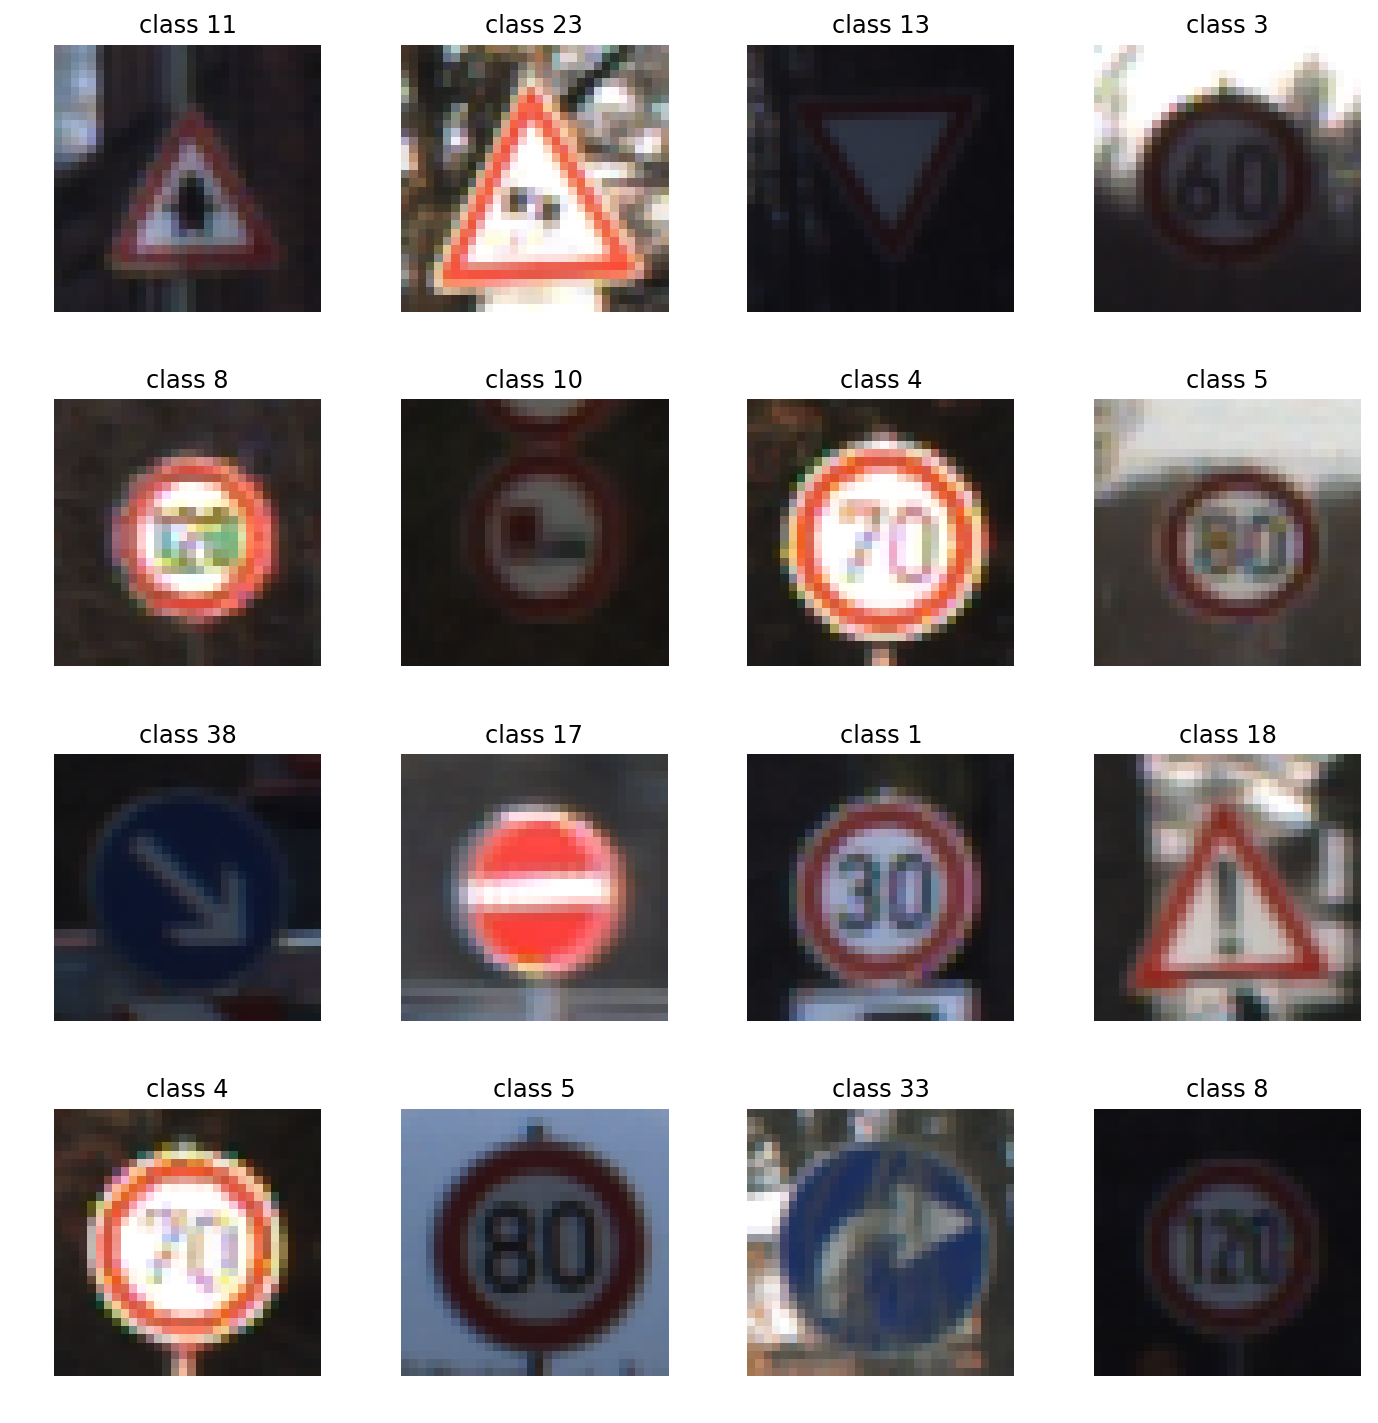

In [21]:
def show_train_samples(data_x=None, data_y=None, vmin=None, vmax=None):
    if (data_x is None) or (data_y is None):
        data_x = X_train
        data_y = y_train

    n_samples = 16
    choice = np.random.randint(data_x.shape[0], size=n_samples)
    samples = data_x[choice]
    fig = plt.figure()
    for i in range(n_samples):
        fig.set_size_inches(10, 10)
        ax = plt.subplot(4, 4, i + 1)
        ax.set_axis_off()
        if vmin is not None and vmax is not None:
            im = ax.imshow(samples[i], vmin=vmin, vmax=vmax)
        else:
            im = ax.imshow(samples[i])
        plt.tight_layout()
        plt.title('class {}'.format(data_y[choice[i]]))
    
show_train_samples()

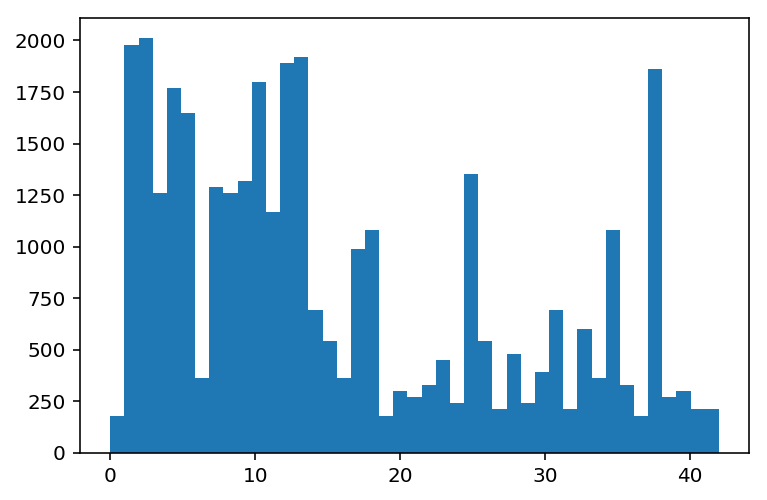

In [22]:
def show_label_histogram(data=None):
    if data is None:
        data = y_train
    plt.hist(data, n_classes)
    plt.show()

show_label_histogram()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [23]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [24]:
import skimage.color
import skimage.exposure
from tqdm import tqdm

def preprocess_image(im):
'''converts one image to gray and takes the values in the range of [-1., 1.]'''

    out = im
    out = skimage.color.rgb2gray(out)
    out = (out - 0.5) * 2.
    return out

def preprocess(samples):
'''preprocess an image set with preprocess_image function'''

    return np.array([preprocess_image(im) for im in tqdm(samples)])

def one_hot_encode(ysamples, n):
    new_sampes = np.zeros((ysamples.shape[0], n))
    new_sampes[range(ysamples.shape[0]), ysamples] = 1
    return new_sampes

In [25]:
X_train_pp = preprocess(X_train)
X_valid_pp = preprocess(X_valid)
X_test_pp = preprocess(X_test)

100%|██████████| 12630/12630 [00:00<00:00, 24198.27it/s]


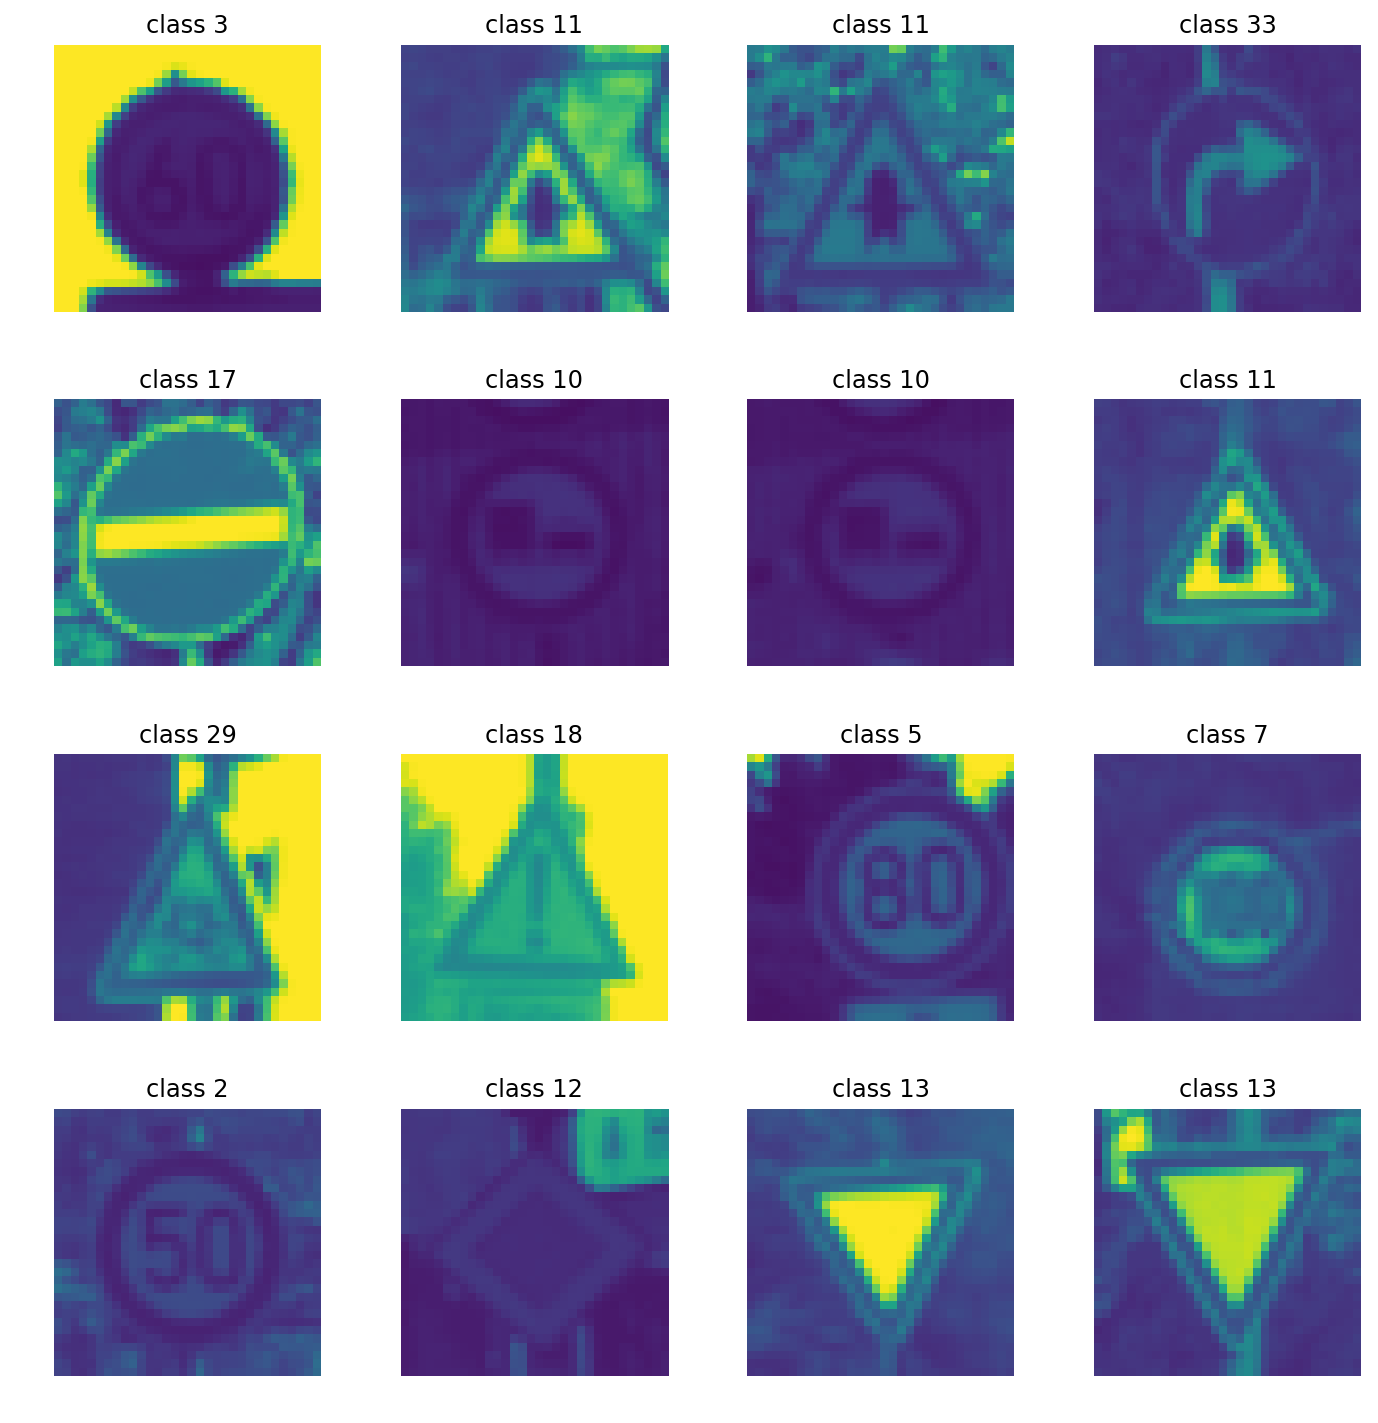

In [26]:
show_train_samples(X_train_pp, y_train, vmin=-1, vmax=1)

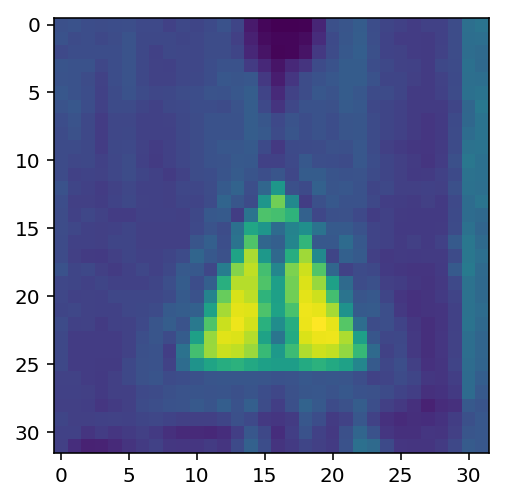

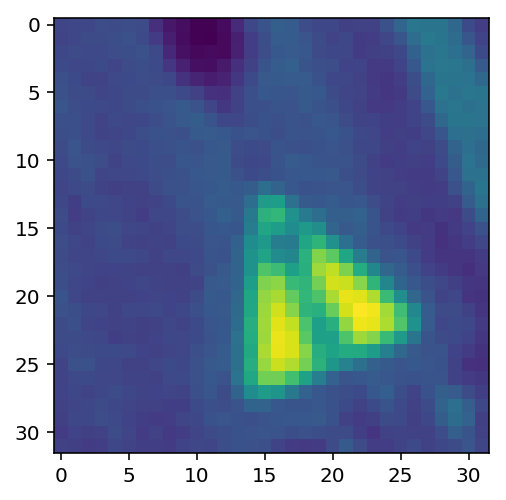

In [27]:
import skimage.transform
import skimage.util

def rand_distort(im):
    out = im
    angle = np.random.rand() * 60. - 30.
    zoom = np.random.rand() * 0.4 - 0.2 + 1.
    out = skimage.transform.rotate(out, angle=angle, mode='symmetric')
    scaled = skimage.transform.rescale(out, scale=zoom, clip=True, mode='symmetric')
    
    if zoom < 1.:
        b = out.shape[0]-scaled.shape[0]
        pad = (int(np.floor(b / 2.0)), int(np.ceil(b / 2.0)))
        out = skimage.util.pad(scaled, pad, mode='symmetric')
    else:
        b = scaled.shape[0]-out.shape[0]
        pad = (int(np.floor(b / 2.0)), int(np.ceil(b / 2.0)))
        out = skimage.util.crop(scaled, pad)
    out += np.random.rand(*out.shape) * 0.01
    return out

def test_distortion(idx):
    plt.imshow(X_train_pp[idx])
    plt.show()
    out = rand_distort(X_train_pp[idx])
    plt.imshow(out)
    plt.show()
    
test_distortion(1685)

In [28]:
from tqdm import tqdm

def augment_data(data_X, data_y):
    aug_X = []
    aug_y = []
    classes = np.unique(data_y)
    largest = np.max([np.sum(data_y == k) for k in classes])
    for k in classes:
        class_samples = data_X[data_y == k]
        n = class_samples.shape[0]
        for i in tqdm(range(largest - n)):
            im = class_samples[np.random.randint(0, n)]
            out = rand_distort(im)
            aug_X.append(out)
            aug_y.append(k)
            
    return np.vstack((data_X, np.array(aug_X))), np.hstack((data_y, np.array(aug_y)))

a_X, a_y = augment_data(X_test_pp, y_test)

100%|██████████| 30/30 [00:00<00:00, 1065.08it/s]
0it [00:00, ?it/s]
100%|██████████| 660/660 [00:00<00:00, 1127.73it/s]


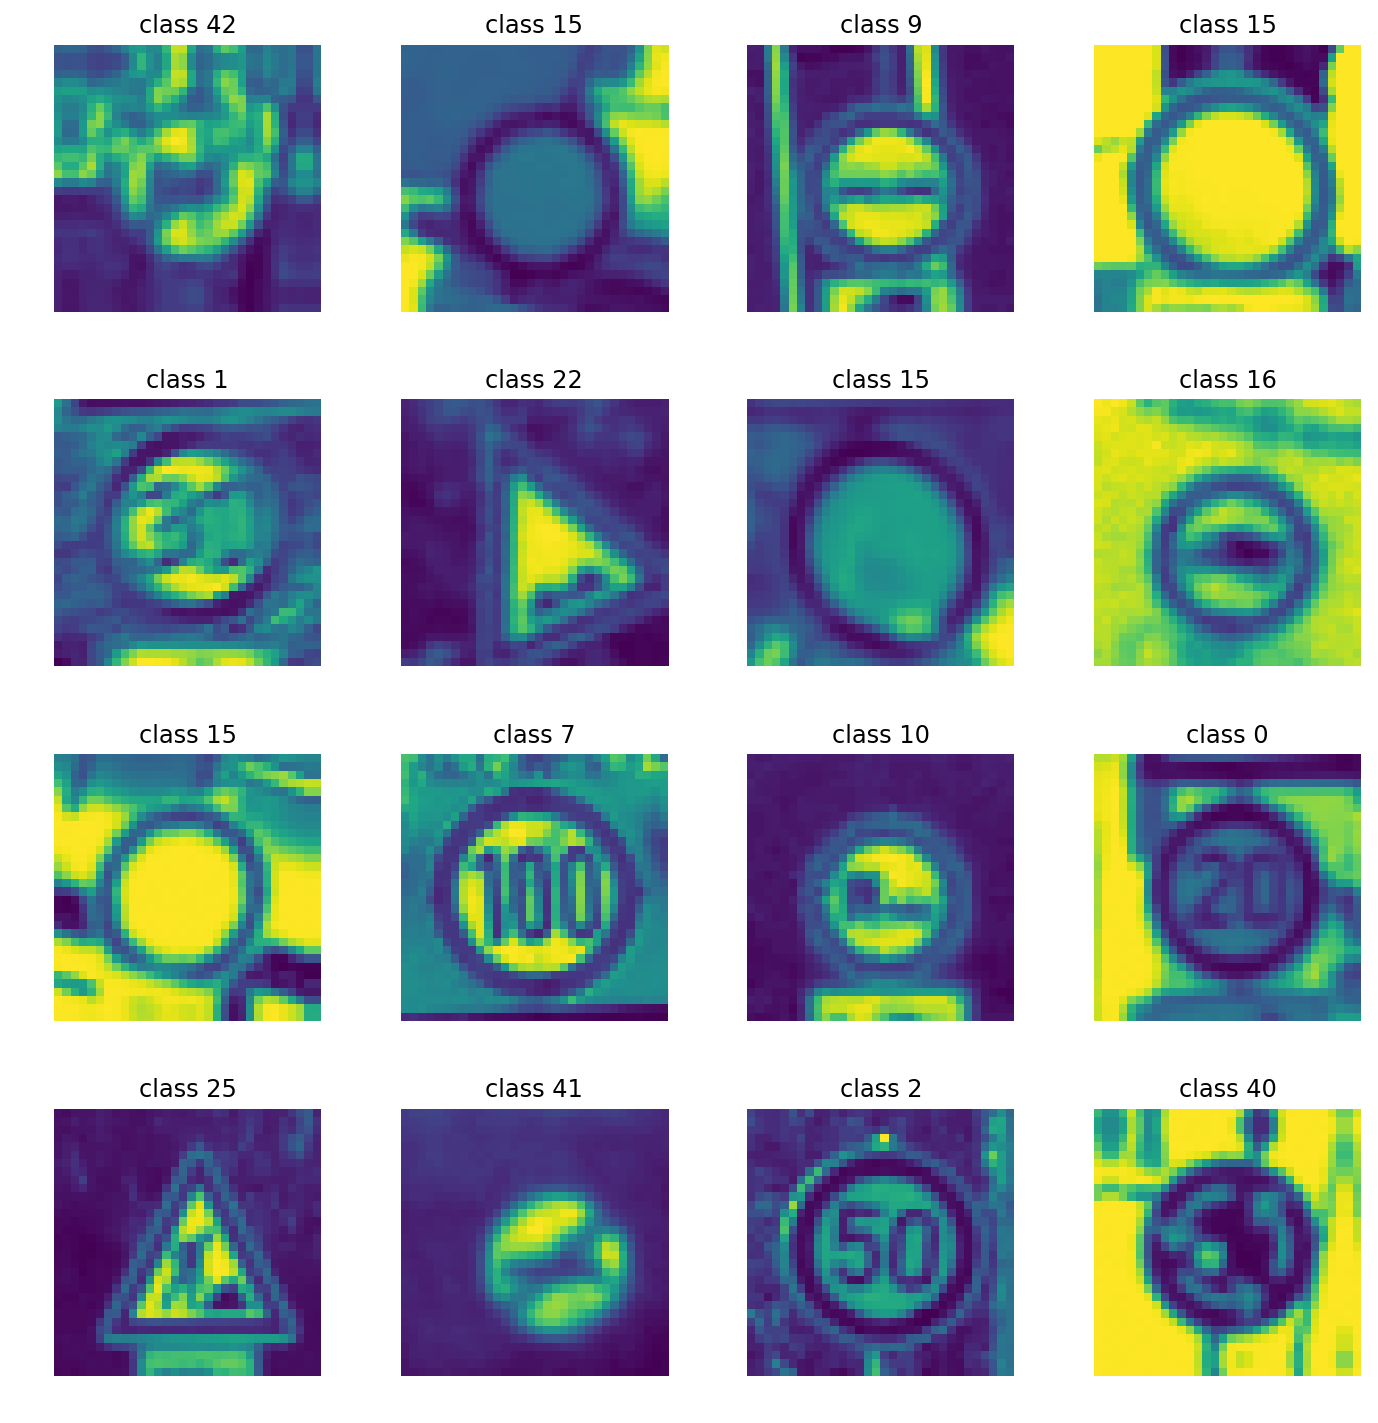

In [29]:
show_train_samples(a_X, a_y)

In [30]:
X_train_pp_aug, y_train_aug = augment_data(X_train_pp, y_train)

100%|██████████| 30/30 [00:00<00:00, 1442.00it/s]
0it [00:00, ?it/s]
100%|██████████| 1800/1800 [00:01<00:00, 1191.85it/s]


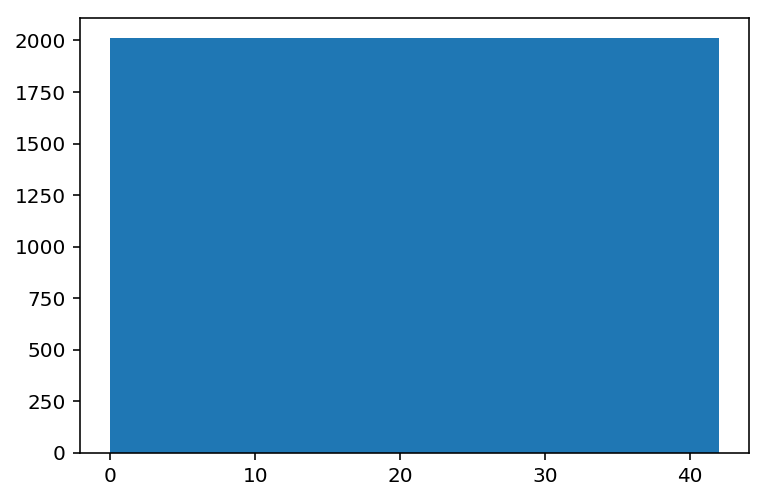

In [41]:
show_label_histogram(y_train_aug)

In [42]:
y_train_pp_aug = one_hot_encode(y_train_aug, n_classes)
y_valid_pp = one_hot_encode(y_valid, n_classes)
y_test_pp = one_hot_encode(y_test, n_classes)

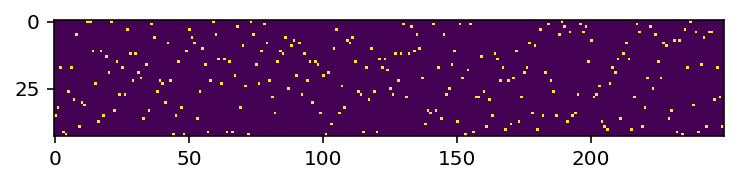

In [43]:
plt.imshow(y_train_pp_aug[np.random.randint(y_train_pp_aug.shape[0], size=250)].T)
plt.show()

### Model Architecture

In [80]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [81]:
import tensorflow as tf
print(tf.__version__)

1.0.1


In [82]:
def LeNet(x, n_classes):
    # Hyperparameters
    mu = 0
    sigma = 0.001
    ch = 2
    fcf = 1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6*ch), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6*ch))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
#     conv1 = tf.layers.batch_normalization(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6*ch, 16*ch), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16*ch))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
#     conv2 = tf.layers.batch_normalization(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400*ch, 120*fcf), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120*fcf))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120*fcf, 84*fcf), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84*fcf))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84*fcf, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [83]:
inputs = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
targets = tf.placeholder(tf.float32, shape=[None, n_classes])
logits = LeNet(inputs, n_classes)
loss = tf.losses.softmax_cross_entropy(targets, logits)
pred = tf.nn.softmax(logits)
train_op = tf.train.AdamOptimizer(0.002).minimize(loss)
# train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(targets, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [84]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [87]:
def get_next_batch(batch_size, data_X, data_y):
    n = data_X.shape[0]
    idx = np.array(range(n))
    np.random.shuffle(idx)
    n_batches = n // batch_size
    for b in range(n_batches):
        yield data_X[idx[b:(b+batch_size)]], data_y[idx[b:(b+batch_size)]]

In [90]:
n_epochs = 1000
n_batch_size = 1024
print_every = 32
validate_every = 512

saver = tf.train.Saver()
checkpoint_path = 'chkpts/model.ckpt'

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    b = 0
    acc_threshold = 0.93
    high_acc_cnt = 0
    high_acc_target_cnt = 5
    should_finish = False
    Xval = X_valid_pp[:,:,:,np.newaxis]
    for e in range(n_epochs):
        for X, y in get_next_batch(n_batch_size, X_train_pp_aug, y_train_pp_aug):
            X = X[:, :, :, np.newaxis]
            d = {inputs: X, targets: y}
            sess.run(train_op, feed_dict=d)
            if (b % print_every == 0):
                loss_value, train_acc = sess.run([loss, accuracy], feed_dict=d)
                print('epoch {:02d} batch {:04d} train_loss={:06.4f} train_acc={:06.4f}'.format(e, b, loss_value, train_acc))
            if (b % validate_every == 0):
                valid_loss, acc_value = sess.run([loss, accuracy], feed_dict={inputs: Xval, targets: y_valid_pp})
                print('\t\tepoch {:02d} batch {:04d} valid_loss={:06.4f} valid_acc={:06.4f}'.format(e, b, valid_loss, acc_value))
                save_path = saver.save(sess, checkpoint_path)
                if acc_value > acc_threshold:
                    high_acc_cnt += 1
                    if high_acc_cnt >= high_acc_target_cnt:
                        should_finish = True
                        print('reached target count')
                        break
                else:
                    high_acc_cnt = 0
            b += 1
            
        if should_finish:
            break;

    save_path = saver.save(sess, checkpoint_path)
    print("model saved in file: {}".format(save_path))

epoch 00 batch 0000 train_loss=3.7609 train_acc=0.0420
		epoch 00 batch 0000 valid_loss=3.7613 valid_acc=0.0068
epoch 00 batch 0032 train_loss=3.7209 train_acc=0.0352
epoch 00 batch 0064 train_loss=3.6511 train_acc=0.0518
epoch 01 batch 0096 train_loss=3.5303 train_acc=0.0850
epoch 01 batch 0128 train_loss=3.0330 train_acc=0.1592
epoch 01 batch 0160 train_loss=2.6033 train_acc=0.2412
epoch 02 batch 0192 train_loss=2.3691 train_acc=0.2754
epoch 02 batch 0224 train_loss=1.9333 train_acc=0.4062
epoch 03 batch 0256 train_loss=2.0007 train_acc=0.3916
epoch 03 batch 0288 train_loss=1.3760 train_acc=0.5664
epoch 03 batch 0320 train_loss=0.9343 train_acc=0.6953
epoch 04 batch 0352 train_loss=1.1998 train_acc=0.6123
epoch 04 batch 0384 train_loss=0.6671 train_acc=0.8037
epoch 04 batch 0416 train_loss=0.4077 train_acc=0.9023
epoch 05 batch 0448 train_loss=0.6774 train_acc=0.7969
epoch 05 batch 0480 train_loss=0.3526 train_acc=0.9092
epoch 06 batch 0512 train_loss=1.0126 train_acc=0.6963
		epoch 

epoch 53 batch 4480 train_loss=0.0027 train_acc=0.9990
epoch 53 batch 4512 train_loss=0.0009 train_acc=1.0000
epoch 54 batch 4544 train_loss=0.0264 train_acc=0.9951
epoch 54 batch 4576 train_loss=0.0010 train_acc=1.0000
epoch 54 batch 4608 train_loss=0.0008 train_acc=1.0000
		epoch 54 batch 4608 valid_loss=0.6450 valid_acc=0.8991
epoch 55 batch 4640 train_loss=0.0060 train_acc=1.0000
epoch 55 batch 4672 train_loss=0.0011 train_acc=1.0000
epoch 56 batch 4704 train_loss=0.2283 train_acc=0.9531
epoch 56 batch 4736 train_loss=0.0020 train_acc=1.0000
epoch 56 batch 4768 train_loss=0.0015 train_acc=1.0000
epoch 57 batch 4800 train_loss=0.0179 train_acc=0.9971
epoch 57 batch 4832 train_loss=0.0031 train_acc=1.0000
epoch 57 batch 4864 train_loss=0.0005 train_acc=1.0000
epoch 58 batch 4896 train_loss=0.0025 train_acc=1.0000
epoch 58 batch 4928 train_loss=0.0010 train_acc=1.0000
epoch 59 batch 4960 train_loss=0.0547 train_acc=0.9824
epoch 59 batch 4992 train_loss=0.0015 train_acc=1.0000
epoch 59

epoch 106 batch 8960 train_loss=0.0002 train_acc=1.0000
epoch 107 batch 8992 train_loss=0.0266 train_acc=0.9922
epoch 107 batch 9024 train_loss=0.0014 train_acc=1.0000
epoch 107 batch 9056 train_loss=0.0005 train_acc=1.0000
epoch 108 batch 9088 train_loss=0.0016 train_acc=1.0000
epoch 108 batch 9120 train_loss=0.0002 train_acc=1.0000
epoch 108 batch 9152 train_loss=0.0002 train_acc=1.0000
epoch 109 batch 9184 train_loss=0.0007 train_acc=1.0000
epoch 109 batch 9216 train_loss=0.0002 train_acc=1.0000
		epoch 109 batch 9216 valid_loss=0.8439 valid_acc=0.9127
epoch 110 batch 9248 train_loss=0.0085 train_acc=0.9980
epoch 110 batch 9280 train_loss=0.0003 train_acc=1.0000
epoch 110 batch 9312 train_loss=0.0001 train_acc=1.0000
epoch 111 batch 9344 train_loss=0.0015 train_acc=1.0000
epoch 111 batch 9376 train_loss=0.0004 train_acc=1.0000
epoch 112 batch 9408 train_loss=0.1323 train_acc=0.9756
epoch 112 batch 9440 train_loss=0.0004 train_acc=1.0000
epoch 112 batch 9472 train_loss=0.0002 train_a

epoch 158 batch 13344 train_loss=0.0001 train_acc=1.0000
epoch 159 batch 13376 train_loss=0.0012 train_acc=1.0000
epoch 159 batch 13408 train_loss=0.0002 train_acc=1.0000
epoch 160 batch 13440 train_loss=0.0721 train_acc=0.9863
epoch 160 batch 13472 train_loss=0.0004 train_acc=1.0000
epoch 160 batch 13504 train_loss=0.0010 train_acc=1.0000
epoch 161 batch 13536 train_loss=0.0076 train_acc=0.9990
epoch 161 batch 13568 train_loss=0.0001 train_acc=1.0000
epoch 161 batch 13600 train_loss=0.0009 train_acc=0.9990
epoch 162 batch 13632 train_loss=0.0008 train_acc=1.0000
epoch 162 batch 13664 train_loss=0.0001 train_acc=1.0000
epoch 163 batch 13696 train_loss=0.0119 train_acc=0.9971
epoch 163 batch 13728 train_loss=0.0003 train_acc=1.0000
epoch 163 batch 13760 train_loss=0.0001 train_acc=1.0000
epoch 164 batch 13792 train_loss=0.0012 train_acc=1.0000
epoch 164 batch 13824 train_loss=0.0002 train_acc=1.0000
		epoch 164 batch 13824 valid_loss=1.0107 valid_acc=0.9116
epoch 164 batch 13856 train_l

epoch 210 batch 17696 train_loss=0.0001 train_acc=1.0000
epoch 211 batch 17728 train_loss=0.0086 train_acc=0.9971
epoch 211 batch 17760 train_loss=0.0006 train_acc=1.0000
epoch 211 batch 17792 train_loss=0.0001 train_acc=1.0000
epoch 212 batch 17824 train_loss=0.0011 train_acc=1.0000
epoch 212 batch 17856 train_loss=0.0002 train_acc=1.0000
epoch 212 batch 17888 train_loss=0.0001 train_acc=1.0000
epoch 213 batch 17920 train_loss=0.0002 train_acc=1.0000
		epoch 213 batch 17920 valid_loss=0.9606 valid_acc=0.9218
epoch 213 batch 17952 train_loss=0.0001 train_acc=1.0000
epoch 214 batch 17984 train_loss=0.0128 train_acc=0.9941
epoch 214 batch 18016 train_loss=0.0007 train_acc=1.0000
epoch 214 batch 18048 train_loss=0.0001 train_acc=1.0000
epoch 215 batch 18080 train_loss=0.0006 train_acc=1.0000
epoch 215 batch 18112 train_loss=0.0001 train_acc=1.0000
epoch 216 batch 18144 train_loss=0.0945 train_acc=0.9824
epoch 216 batch 18176 train_loss=0.0001 train_acc=1.0000
epoch 216 batch 18208 train_l

epoch 262 batch 22048 train_loss=0.0001 train_acc=1.0000
epoch 262 batch 22080 train_loss=0.0001 train_acc=1.0000
epoch 263 batch 22112 train_loss=0.0005 train_acc=1.0000
epoch 263 batch 22144 train_loss=0.0001 train_acc=1.0000
epoch 264 batch 22176 train_loss=0.0560 train_acc=0.9902
epoch 264 batch 22208 train_loss=0.0001 train_acc=1.0000
epoch 264 batch 22240 train_loss=0.0003 train_acc=1.0000
epoch 265 batch 22272 train_loss=0.0024 train_acc=1.0000
epoch 265 batch 22304 train_loss=0.0001 train_acc=1.0000
epoch 265 batch 22336 train_loss=0.0000 train_acc=1.0000
epoch 266 batch 22368 train_loss=0.0005 train_acc=1.0000
epoch 266 batch 22400 train_loss=0.0003 train_acc=1.0000
epoch 267 batch 22432 train_loss=0.0249 train_acc=0.9932
epoch 267 batch 22464 train_loss=0.0004 train_acc=1.0000
epoch 267 batch 22496 train_loss=0.0001 train_acc=1.0000
epoch 268 batch 22528 train_loss=0.0007 train_acc=1.0000
		epoch 268 batch 22528 valid_loss=0.8986 valid_acc=0.9327
epoch 268 batch 22560 train_l

epoch 314 batch 26400 train_loss=0.0001 train_acc=1.0000
epoch 314 batch 26432 train_loss=0.0033 train_acc=0.9990
epoch 315 batch 26464 train_loss=0.0076 train_acc=0.9951
epoch 315 batch 26496 train_loss=0.0001 train_acc=1.0000
epoch 315 batch 26528 train_loss=0.0000 train_acc=1.0000
epoch 316 batch 26560 train_loss=0.0009 train_acc=1.0000
epoch 316 batch 26592 train_loss=0.0001 train_acc=1.0000
epoch 316 batch 26624 train_loss=0.0001 train_acc=1.0000
		epoch 316 batch 26624 valid_loss=1.1420 valid_acc=0.9091
epoch 317 batch 26656 train_loss=0.0005 train_acc=1.0000
epoch 317 batch 26688 train_loss=0.0002 train_acc=1.0000
epoch 318 batch 26720 train_loss=0.0057 train_acc=0.9971
epoch 318 batch 26752 train_loss=0.0001 train_acc=1.0000
epoch 318 batch 26784 train_loss=0.0001 train_acc=1.0000
epoch 319 batch 26816 train_loss=0.0004 train_acc=1.0000
epoch 319 batch 26848 train_loss=0.0000 train_acc=1.0000
epoch 320 batch 26880 train_loss=0.0857 train_acc=0.9814
epoch 320 batch 26912 train_l

epoch 366 batch 30752 train_loss=0.0014 train_acc=1.0000
epoch 366 batch 30784 train_loss=0.0075 train_acc=0.9971
epoch 366 batch 30816 train_loss=0.0002 train_acc=1.0000
epoch 367 batch 30848 train_loss=0.0003 train_acc=1.0000
epoch 367 batch 30880 train_loss=0.0000 train_acc=1.0000
epoch 368 batch 30912 train_loss=0.0403 train_acc=0.9883
epoch 368 batch 30944 train_loss=0.0001 train_acc=1.0000
epoch 368 batch 30976 train_loss=0.0002 train_acc=1.0000
epoch 369 batch 31008 train_loss=0.0131 train_acc=0.9951
epoch 369 batch 31040 train_loss=0.0001 train_acc=1.0000
epoch 369 batch 31072 train_loss=0.0000 train_acc=1.0000
epoch 370 batch 31104 train_loss=0.0003 train_acc=1.0000
epoch 370 batch 31136 train_loss=0.0000 train_acc=1.0000
epoch 371 batch 31168 train_loss=0.0101 train_acc=0.9961
epoch 371 batch 31200 train_loss=0.0009 train_acc=1.0000
epoch 371 batch 31232 train_loss=0.0001 train_acc=1.0000
		epoch 371 batch 31232 valid_loss=1.0409 valid_acc=0.9361
epoch 372 batch 31264 train_l

In [125]:
with tf.Session() as sess:
    saver.restore(sess, "chkpts/model.ckpt")
    acc = sess.run(accuracy, feed_dict={inputs: X_test_pp[:, :, :, np.newaxis], targets: y_test_pp})
    print('test_acc={:06.4f}'.format(acc))

test_acc=0.9121


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

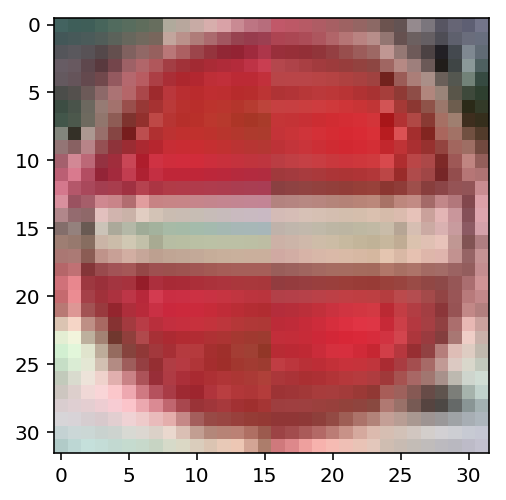

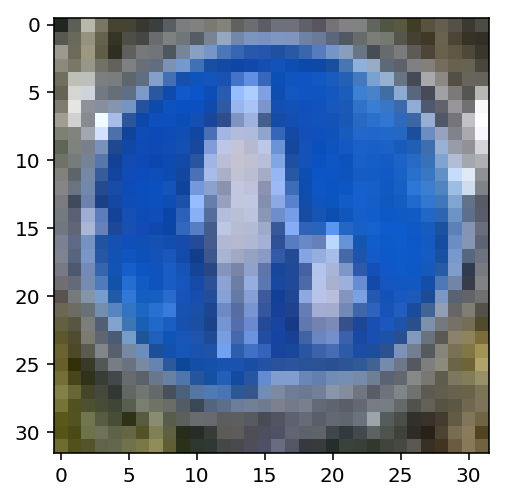

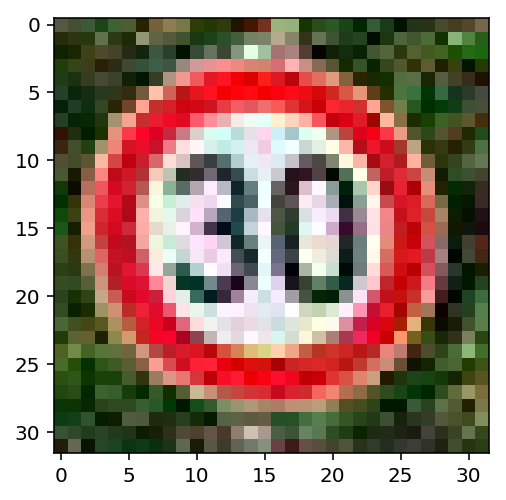

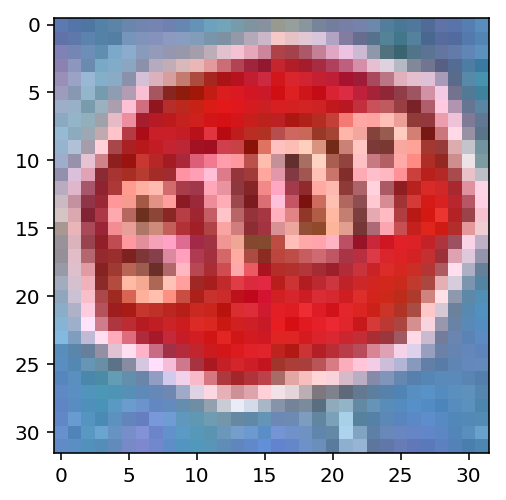

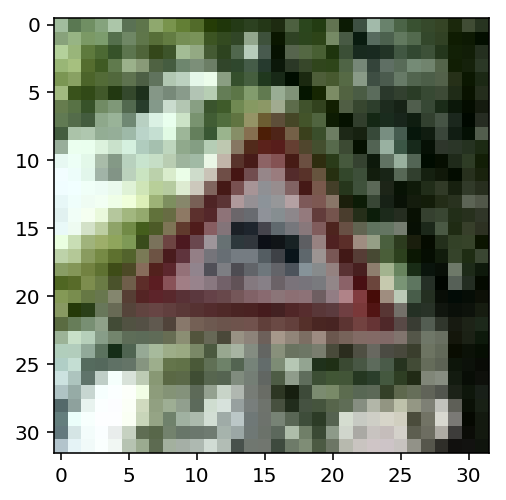

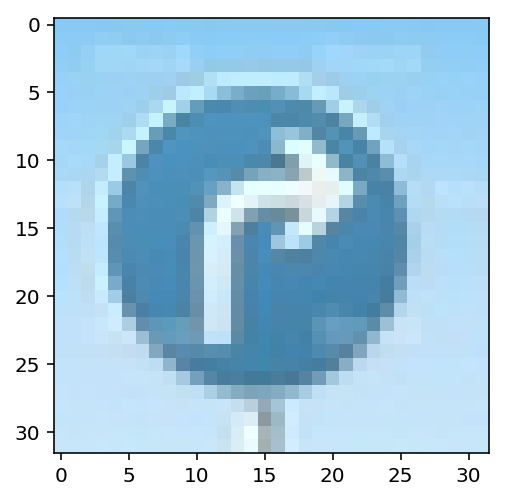

In [126]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import skimage.io

new_test_samples = []
for i in range(6):
    new_test_samples.append(skimage.io.imread('new_images/out-{}.jpg'.format(i+1)))
    
for im in new_test_samples:
    plt.imshow(im)
    plt.show()

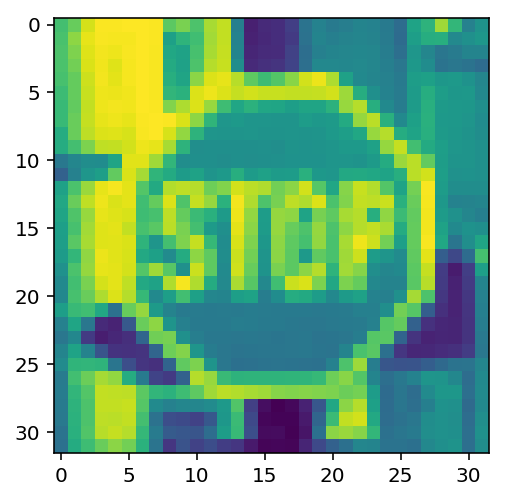

In [136]:
def get_rand_sample_from_class(dataX, datay, k):
    samples = dataX[datay == k]
    n = samples.shape[0]
    return samples[np.random.randint(n)]
    
plt.imshow(get_rand_sample_from_class(X_test_pp, y_test, 14))
plt.show()

### Predict the Sign Type for Each Image

In [139]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

new_test_samples_pp = preprocess(np.array(new_test_samples))

100%|██████████| 6/6 [00:00<00:00, 12697.19it/s]


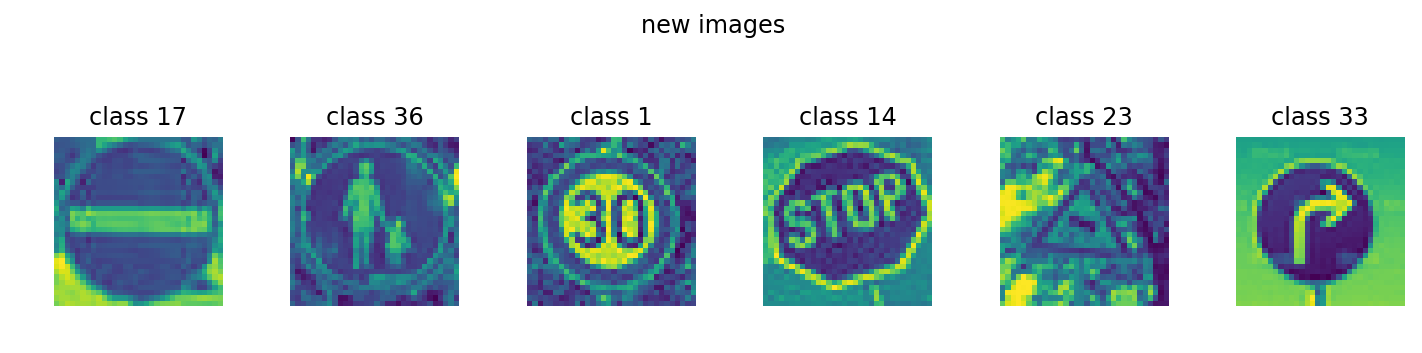

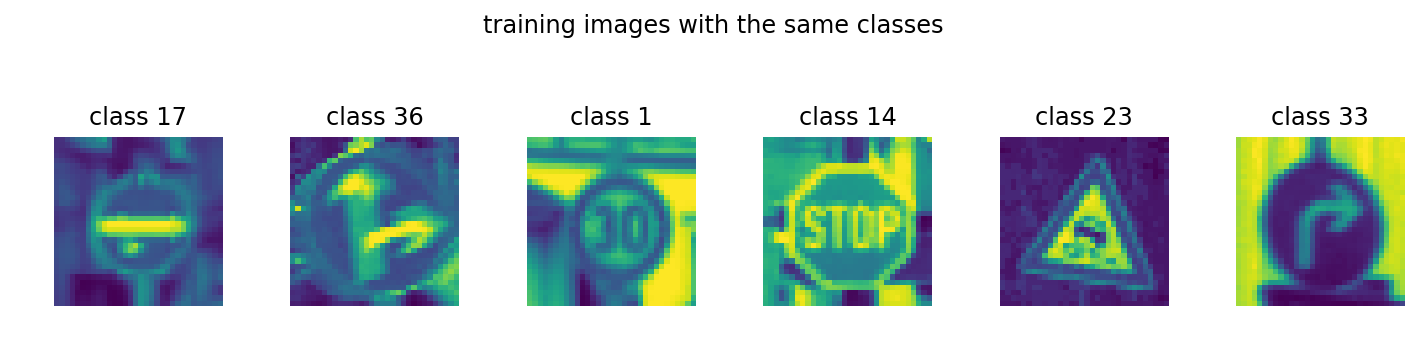

In [159]:
with tf.Session() as sess:
    saver.restore(sess, "chkpts/model.ckpt")
    predictions = sess.run(tf.argmax(pred, 1), feed_dict={inputs: new_test_samples_pp[:, :, :, np.newaxis]})

fig = plt.figure()
fig.set_size_inches(10, 3)
for i in range(predictions.shape[0]):
    ax = plt.subplot(1, predictions.shape[0], i + 1)
    ax.set_axis_off()
    ax.imshow(new_test_samples_pp[i])
    plt.tight_layout()
    plt.title('class {}'.format(predictions[i]))
fig.suptitle('new images')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 3)
fig.suptitle('training images with the same classes')
for i in range(predictions.shape[0]):
    ax = plt.subplot(1, predictions.shape[0], i + 1)
    ax.set_axis_off()
    ax.imshow(get_rand_sample_from_class(X_test_pp, y_test, predictions[i]))
    plt.tight_layout()
    plt.title('class {}'.format(predictions[i]))
plt.show()


### Analyze Performance

In [156]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print('new test acc {}'.format(5. / 6.))

new test acc 0.8333333333333334


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

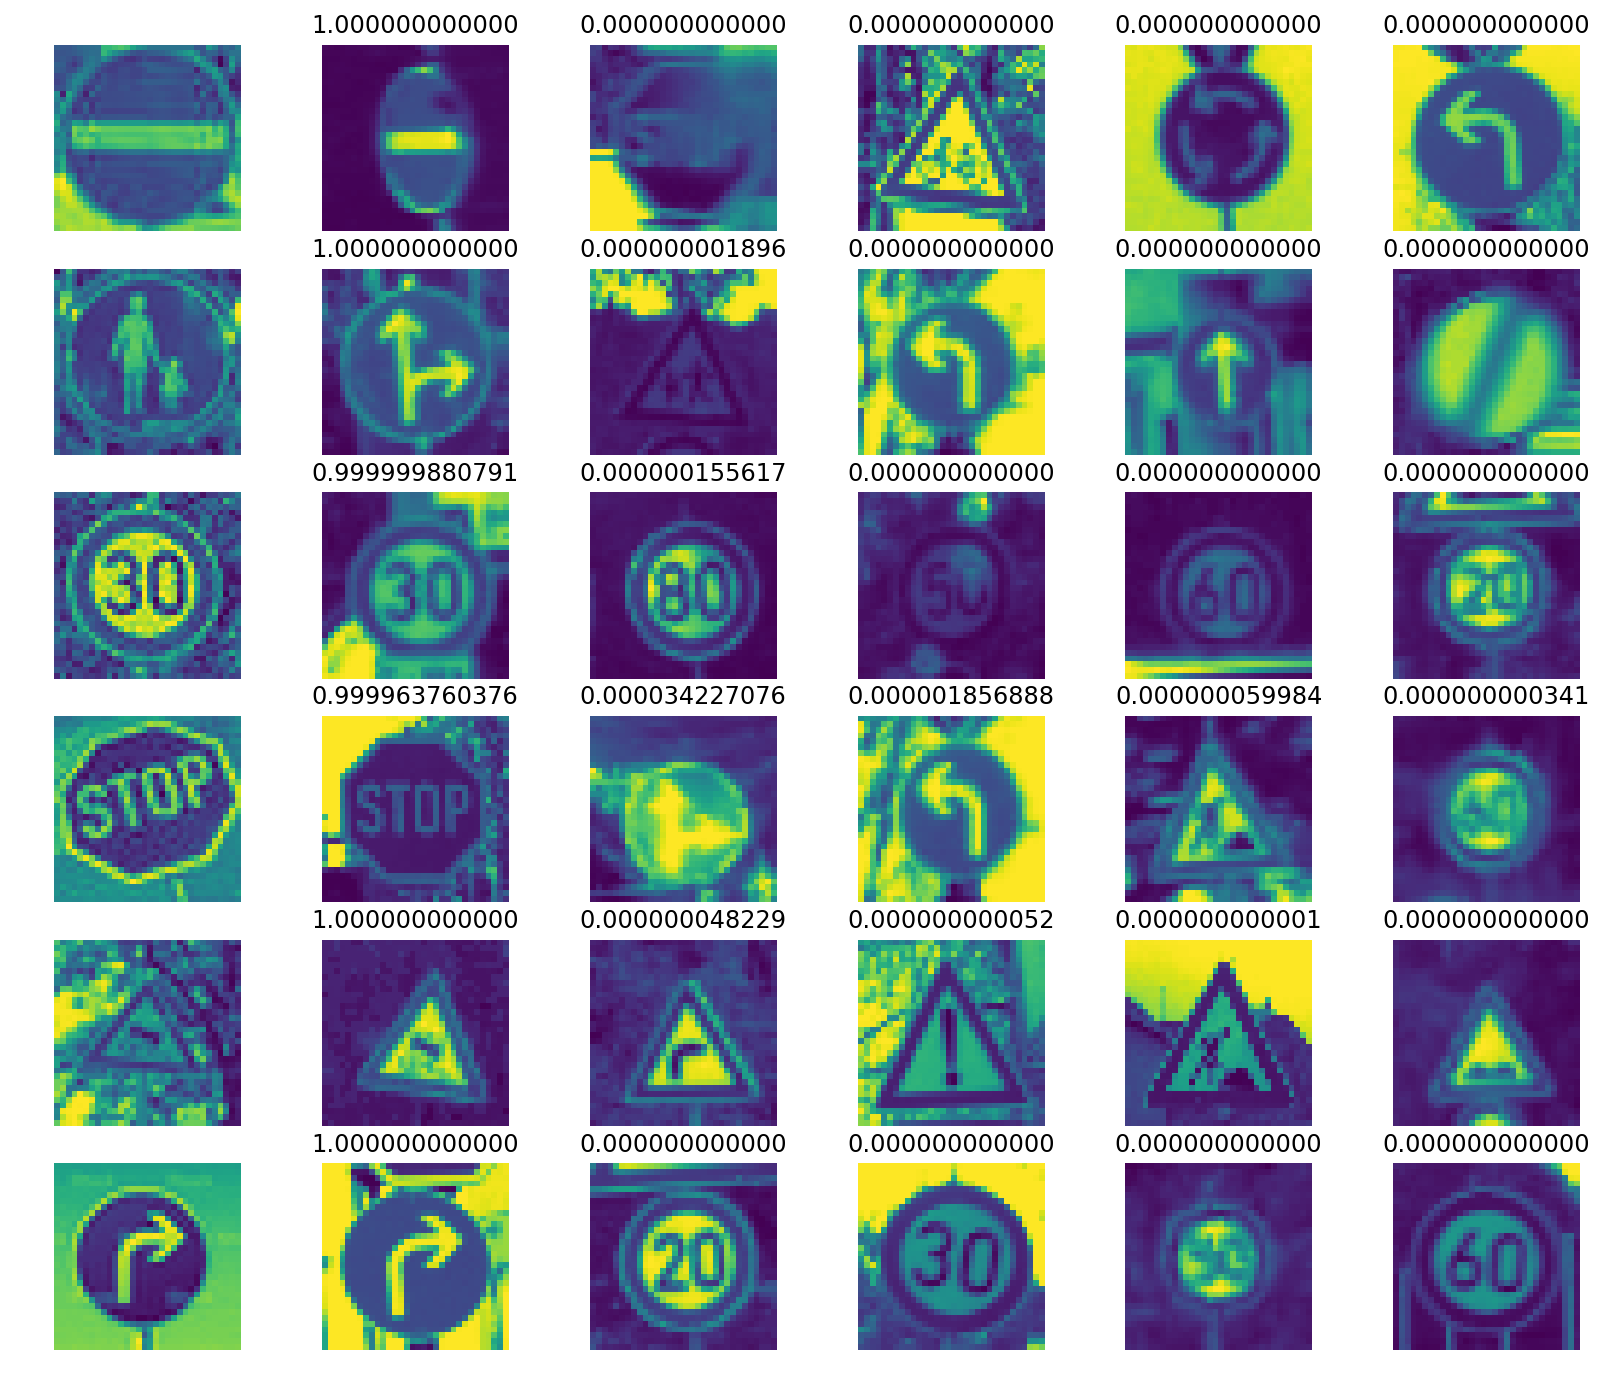

In [180]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, "chkpts/model.ckpt")
    top_k_prob, top_k_ind = sess.run(tf.nn.top_k(pred, 5), feed_dict={inputs: new_test_samples_pp[:, :, :, np.newaxis]})
    
fig = plt.figure()
fig.set_size_inches(14, 12)
n = new_test_samples_pp.shape[0]
for i in range(n):
    ax = plt.subplot(n, 6, i * 6 + 1)
    ax.set_axis_off()
    ax.imshow(new_test_samples_pp[i])
    plt.title('')
    for j in range(1, 6):
        ax = plt.subplot(n, 6, i * 6 + j + 1)
        ax.set_axis_off()
        ax.imshow(get_rand_sample_from_class(X_test_pp, y_test, top_k_ind[i, j-1]))
        plt.title('{:.12f}'.format(top_k_prob[i, j-1]))
plt.show()

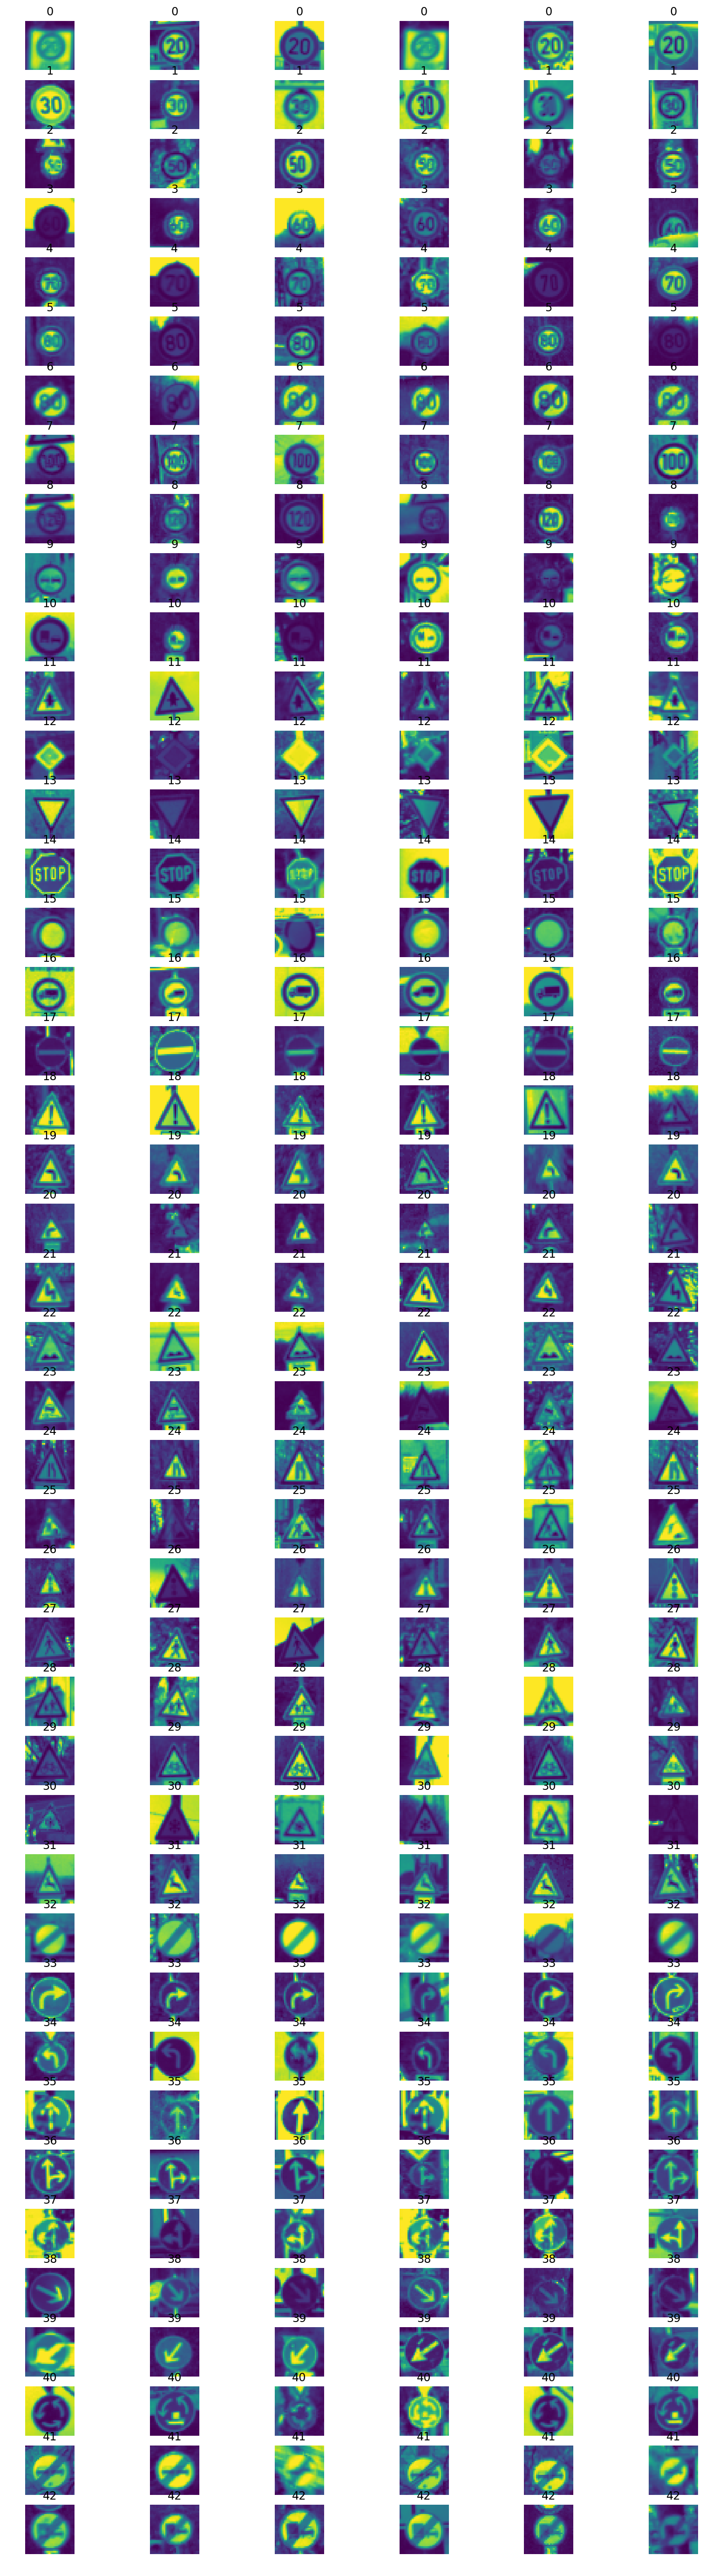

In [187]:
fig = plt.figure()
fig.set_size_inches(14, 50)
n = 43
for i in range(n):
    for j in range(6):
        ax = plt.subplot(n, 6, i * 6 + j + 1)
        ax.set_axis_off()
        ax.imshow(get_rand_sample_from_class(X_train_pp, y_train, i))
        plt.title('{}'.format(i))
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")